In [11]:
# Libraries for data manipulation and analysis
import pandas as pd
import numpy as np
from collections import Counter

# Libraries for machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Libraries for model evaluation and metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preprocessing and handling imbalances
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

Showing the Dataset

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [4]:
print("Number of columns: {}".format(df.shape[1]))
print("Number of rows: {}".format(df.shape[0]))

Number of columns: 31
Number of rows: 284807


In [6]:
df.isnull().sum()
df.duplicated().any()

True

Cleaning The Dataset

In [7]:
df.dropna()
df = df.drop_duplicates()


In [8]:
print("Number of columns: {}".format(df.shape[1]))
print("Number of rows: {}".format(df.shape[0]))#1081

Number of columns: 31
Number of rows: 283726


Correlation Heatmap

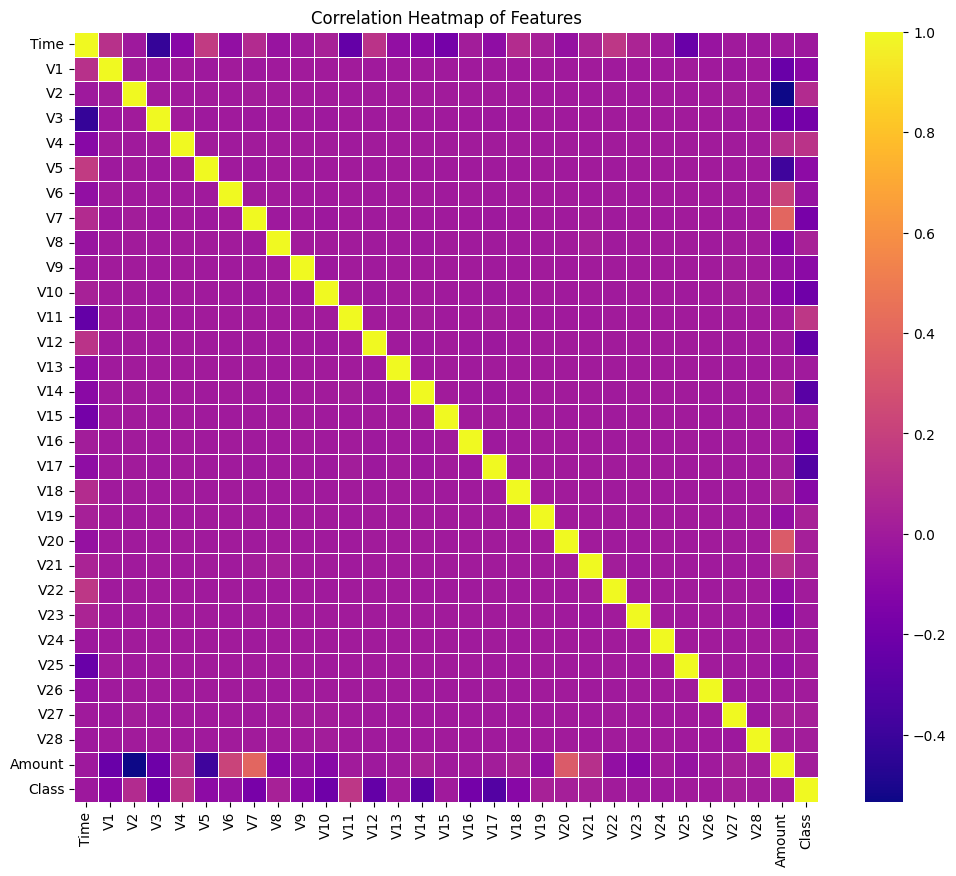

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='plasma', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

Histogram

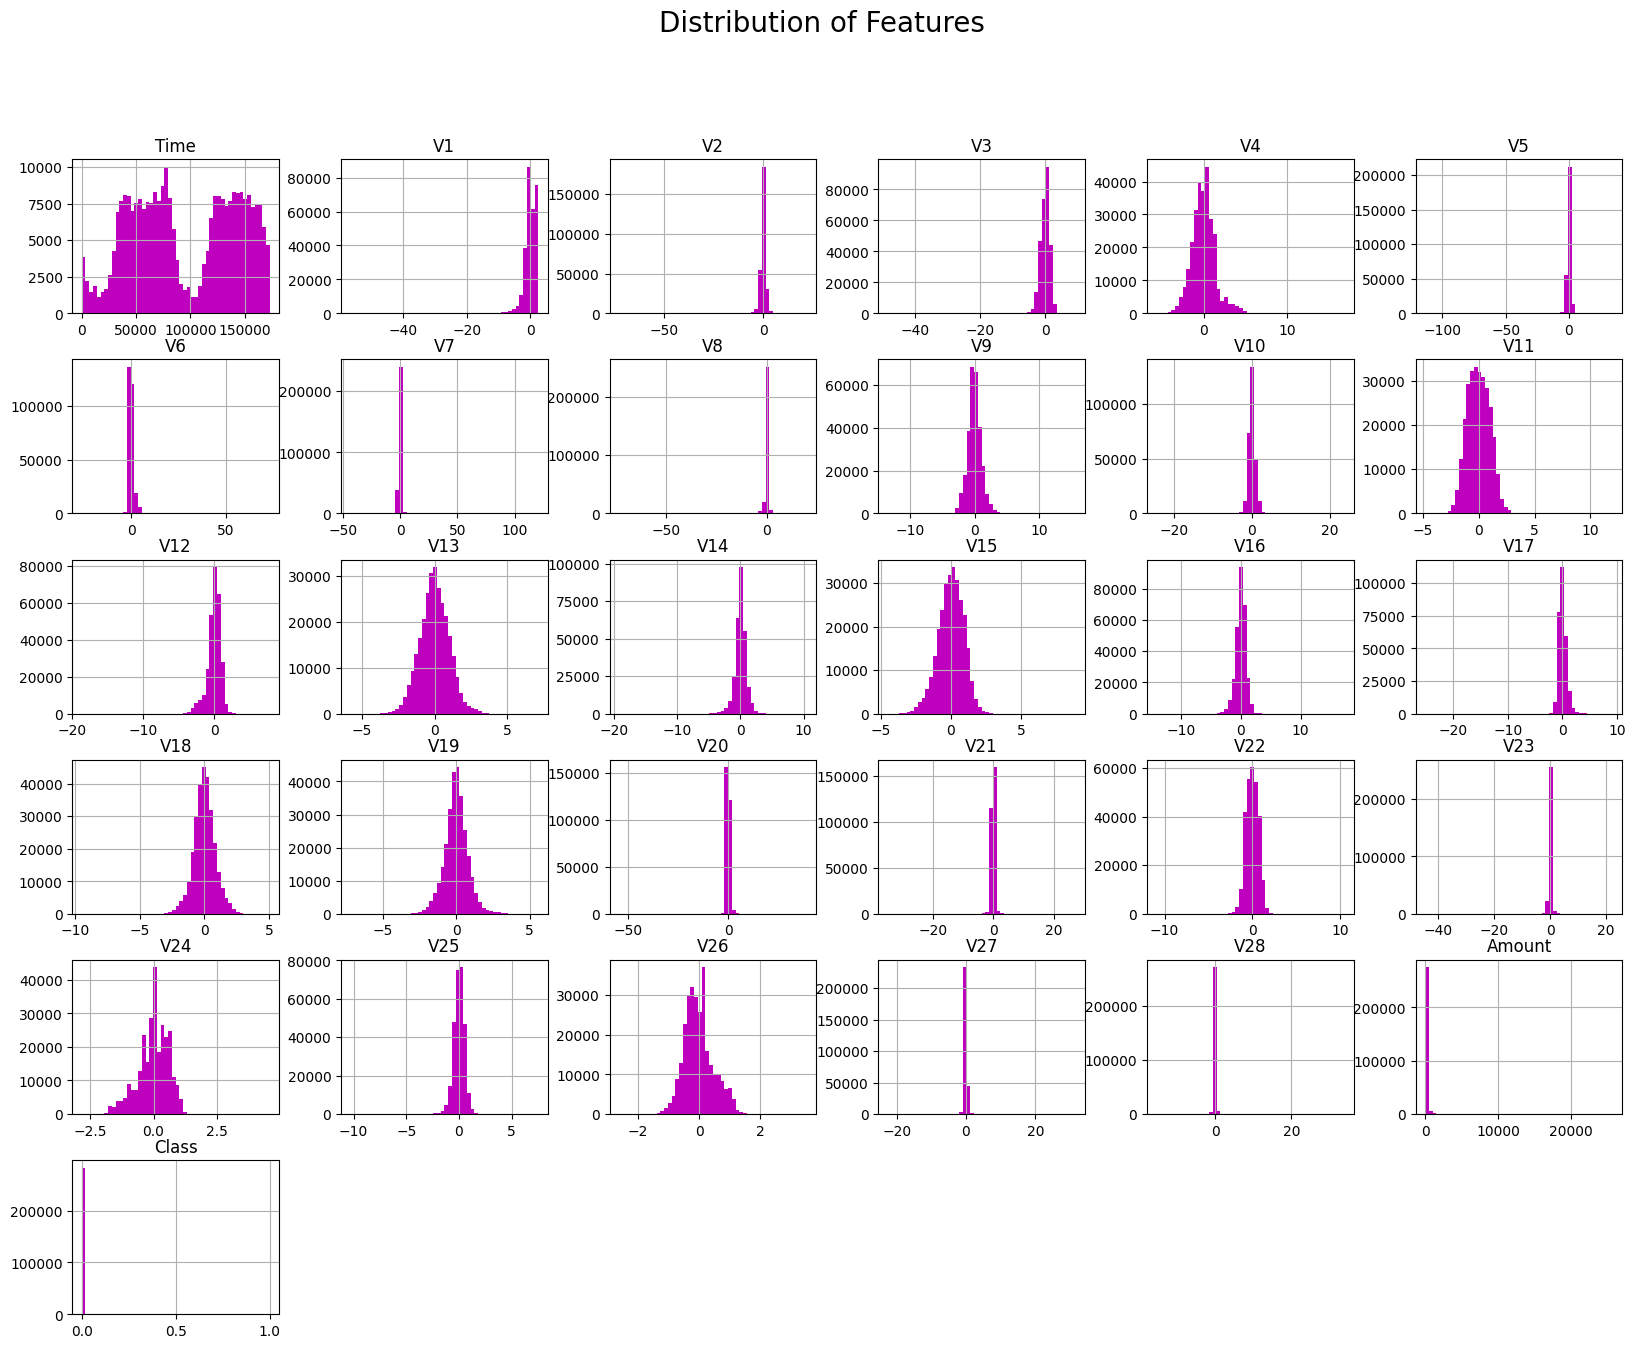

In [13]:
df.hist(figsize=(20, 15), bins=50, color='m')
plt.suptitle('Distribution of Features', fontsize=20)
plt.show()

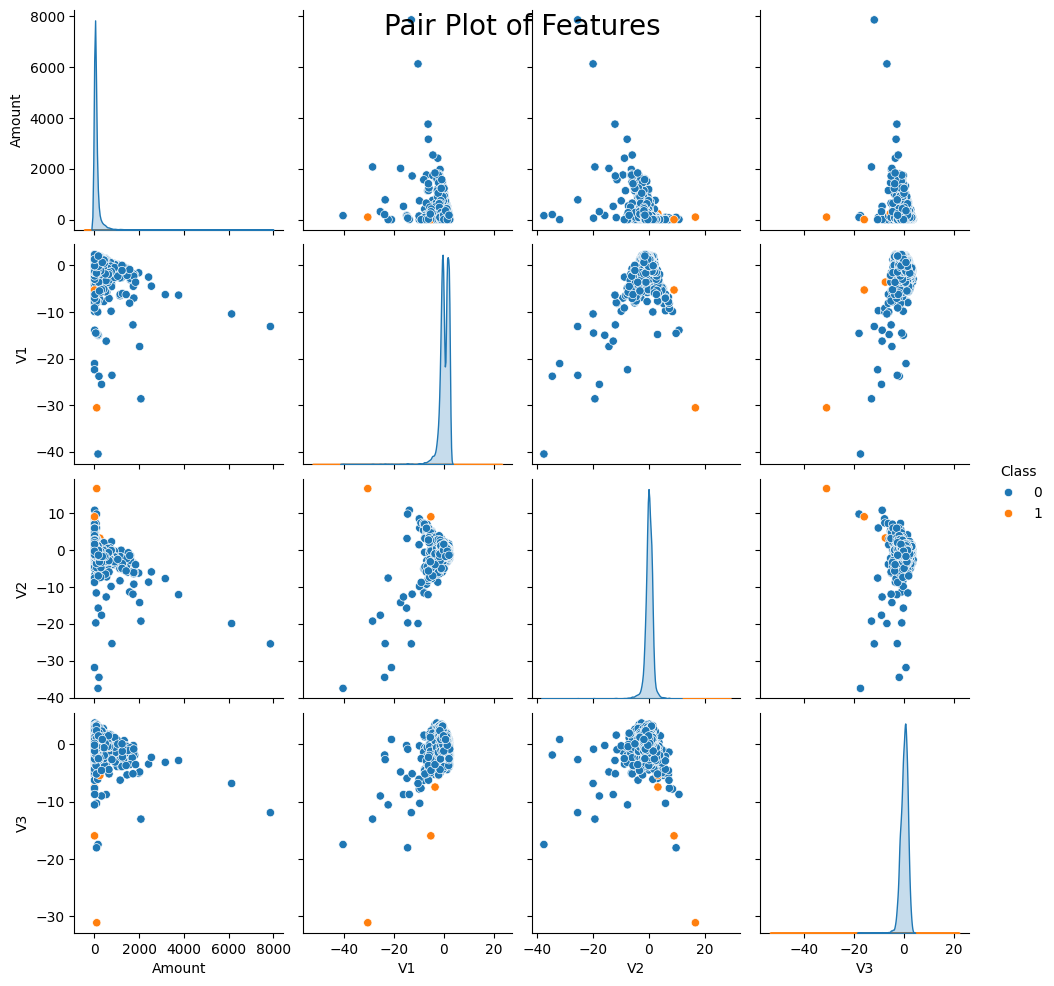

In [14]:
sample_df = df.sample(5000, random_state=42)

sns.pairplot(sample_df, hue='Class', vars=['Amount', 'V1', 'V2', 'V3'])
plt.suptitle('Pair Plot of Features', fontsize=20)
plt.show()

In [15]:
fraud_counts = df['Class'].value_counts()

print(f"Non-Fraud cases: {fraud_counts[0]}")
print(f"Fraud cases: {fraud_counts[1]}")#data imbalanced

Non-Fraud cases: 283253
Fraud cases: 473


In [ ]:
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df.drop(['Amount'], axis=1, inplace=True)
df.drop(['Time'], axis=1, inplace=True)


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*Handiling the imbalance*

In [ ]:
# Check original training set class distribution
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE ONLY on the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({0: 226597, 1: 383})
After SMOTE: Counter({0: 226597, 1: 226597})


In [20]:
roc_data = {}

Logistic Regression

In [21]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Logistic Regression\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_data['Logistic Regression'] = (fpr, tpr, roc_auc_score(y_test, y_proba))

Logistic Regression

Confusion Matrix:
[[55257  1399]
 [   10    80]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.05      0.89      0.10        90

    accuracy                           0.98     56746
   macro avg       0.53      0.93      0.54     56746
weighted avg       1.00      0.98      0.99     56746



KNN

In [22]:
model = KNeighborsClassifier()
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("K-Nearest Neighbors\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_data['KNN'] = (fpr, tpr, roc_auc_score(y_test, y_proba))

K-Nearest Neighbors

Confusion Matrix:
[[56587    69]
 [   20    70]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.50      0.78      0.61        90

    accuracy                           1.00     56746
   macro avg       0.75      0.89      0.81     56746
weighted avg       1.00      1.00      1.00     56746



Gradient Boosting

In [ ]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Gradient Boosting\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_data['Gradient Boosting'] = (fpr, tpr, roc_auc_score(y_test, y_proba))

KeyboardInterrupt: 

Random Forest

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Random Forest\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_data['Random Forest'] = (fpr, tpr, roc_auc_score(y_test, y_proba))

Decision Tree

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Decision Tree\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_data['Decision Tree'] = (fpr, tpr, roc_auc_score(y_test, y_proba))

SVC

In [ ]:
model = SVC(probability=True)  # required for ROC curve
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Support Vector Classifier\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_data['SVC'] = (fpr, tpr, roc_auc_score(y_test, y_proba))

*ROC*

In [ ]:
plt.figure(figsize=(10, 8))

# Loop through your stored ROC data
for model_name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')

# Plot the diagonal (random guess line)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

# Labels, legend, title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison Across Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
models = {
    'Logistic Regression': log_reg_model,
    'KNN': knn_model,
    'Gradient Boosting': gb_model,
    'Random Forest': rf_model,
    'Decision Tree': dt_model,
    'SVC': svc_model,
}

# Initialize a dictionary to store results
results = {}

# Evaluate all models and store results
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Store evaluation metrics for later display
    results[model_name] = {
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred),
        "ROC AUC Score": roc_auc_score(y_test, y_proba)
    }

In [ ]:
# Logistic Regression Evaluation
print("=== Logistic Regression ===")
print("Confusion Matrix:\n", results['Logistic Regression']['Confusion Matrix'])
print("Classification Report:\n", results['Logistic Regression']['Classification Report'])
print("ROC AUC Score:", results['Logistic Regression']['ROC AUC Score'])


In [ ]:
# KNN Evaluation
print("=== KNN ===")
print("Confusion Matrix:\n", results['KNN']['Confusion Matrix'])
print("Classification Report:\n", results['KNN']['Classification Report'])
print("ROC AUC Score:", results['KNN']['ROC AUC Score'])


In [ ]:
# Gradient Boosting Evaluation
print("=== Gradient Boosting ===")
print("Confusion Matrix:\n", results['Gradient Boosting']['Confusion Matrix'])
print("Classification Report:\n", results['Gradient Boosting']['Classification Report'])
print("ROC AUC Score:", results['Gradient Boosting']['ROC AUC Score'])


In [ ]:
# Random Forest Evaluation
print("=== Random Forest ===")
print("Confusion Matrix:\n", results['Random Forest']['Confusion Matrix'])
print("Classification Report:\n", results['Random Forest']['Classification Report'])
print("ROC AUC Score:", results['Random Forest']['ROC AUC Score'])


In [ ]:
# Decision Tree Evaluation
print("=== Decision Tree ===")
print("Confusion Matrix:\n", results['Decision Tree']['Confusion Matrix'])
print("Classification Report:\n", results['Decision Tree']['Classification Report'])
print("ROC AUC Score:", results['Decision Tree']['ROC AUC Score'])


In [ ]:
# SVC Evaluation
print("=== SVC ===")
print("Confusion Matrix:\n", results['SVC']['Confusion Matrix'])
print("Classification Report:\n", results['SVC']['Classification Report'])
print("ROC AUC Score:", results['SVC']['ROC AUC Score'])
